# Scraping

## Importing libraries

In [26]:
import pandas as pd 
import numpy as np
import datetime
import pytz

## Defining the dataset that has been scraped by python script

In [27]:
df = pd.read_csv('Tesla_Comments_filtered.csv', delimiter=";")


C:\Users\maart\AppData\Local\Temp\ipykernel_17368\369132780.py:1: DtypeWarning: Columns (7,8,9,10,11,12,13,14) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('Tesla_Comments_filtered.csv', delimiter=";")


In [28]:
df = df[['subreddit','id','body','created_utc','parent_id']]


## Numerical transformation

In [29]:
# Convert "body" column to integers
df['created_utc'] = pd.to_numeric(df['created_utc'], errors='coerce')
df = df.dropna(subset=['created_utc'])

# Define function to convert Unix timestamp to datetime object
def unix_to_datetime(timestamp):
    return datetime.datetime.fromtimestamp(timestamp)

# Apply function to Unix timestamp column
df['date'] = df['created_utc'].apply(unix_to_datetime)

C:\Users\maart\AppData\Local\Temp\ipykernel_17368\2494881415.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['created_utc'] = pd.to_numeric(df['created_utc'], errors='coerce')
C:\Users\maart\AppData\Local\Temp\ipykernel_17368\2494881415.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['date'] = df['created_utc'].apply(unix_to_datetime)


In [30]:
print(df['body'].isnull().sum())

20149


In [31]:
df.dropna(inplace=True)

C:\Users\maart\AppData\Local\Temp\ipykernel_17368\1379821321.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.dropna(inplace=True)


## Usage of pysentimiento to create sentiment scores

In [32]:
from pysentimiento import create_analyzer
emotion_analyzer = create_analyzer(task="sentiment", lang="en")

c:\Users\maart\AppData\Local\Programs\Python\Python310\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [ ]:
# Be aware applying this model takes approx two hours to run
#Using the emotion analyer on all reddit comments and put it under a new column 
df['emotion'] = df['body'].apply(emotion_analyzer.predict)


In [ ]:
#This was done to list the probabilities of the analyzeroutput
df['probas'] = df['emotion'].apply(lambda x: list(x.probas.items()))


## Calculating the sentiment scores as one for every reddit comment

In [34]:
#This was done to get a score that can be used in the next step to match frequencies with stock prices

calc_reg_output = lambda row: -1 * row['probas'][0][1] + 0 * row['probas'][1][1] + 1 * row['probas'][2][1]


In [ ]:
#Now we apply the above function to every single row so that we have one score for every comment
df['reg_output'] = df.apply(calc_reg_output, axis=1)


In [36]:
df

,subreddit,id,body,created_utc,parent_id,date
0,TeslaMotors,hqqtbh2,"If help is needed, use our stickied support th...",1.640994e+09,t3_rt6fwg,2022-01-01 00:46:50
1,TeslaMotors,hqqtz7i,Requirements: \n\n• Fits under the aero cover ...,1.640995e+09,t3_rt6j33,2022-01-01 00:51:46
2,TeslaMotors,hqqu7z3,Photo credit @rkaplan1 on Twitter,1.640995e+09,t3_rt6kex,2022-01-01 00:53:37
3,TeslaMotors,hqqxko8,I've wanted an Apple MagSafe charger in my cen...,1.640996e+09,t3_rt72vs,2022-01-01 01:20:13
4,TeslaMotors,hqr8kka,I see you set your temperature to: NICE.,1.641002e+09,t3_rt8o5j,2022-01-01 02:47:11
...,...,...,...,...,...,...
168121,TeslaMotors,ie4b81w,Is this with the unreleased beta software? I’m...,1.656459e+09,t3_vn0xq2,2022-06-29 01:24:55
168122,TeslaMotors,ie4bcyt,No still 10.12.2. Just in another vehicle.,1.656459e+09,t3_vn0yi6,2022-06-29 01:25:58
168123,TeslaMotors,ie4betk,"Also wondering this question, would love to re...",1.656459e+09,t3_vn0ysw,2022-06-29 01:26:22
168124,TeslaMotors,ie4nqju,Looks like a bunch of companies are all releas...,1.656465e+09,t3_vn0ysw,2022-06-29 03:03:36


In [ ]:
#This is done to save the output of the analyzeroutput, so that above code does not have to be run again
df.to_csv('Tesla_Comments_Filtered_Analyzed.csv', index=False)

# Aggregation 

## Importing libraries

In [38]:
import pandas as pd 
import numpy as np
import datetime
import pytz

## Defining the datasets

In [74]:
df1 = pd.read_csv('Tesla_Comments_Filtered_Analyzed.csv', delimiter=",")


In [75]:
TSLA = pd.read_csv('TSLA_2022.csv', delimiter=',')

In [76]:
TSLA.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 251 entries, 0 to 250
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       251 non-null    object 
 1   Open       251 non-null    float64
 2   High       251 non-null    float64
 3   Low        251 non-null    float64
 4   Close      251 non-null    float64
 5   Adj Close  251 non-null    float64
 6   Volume     251 non-null    int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 13.9+ KB


In [77]:
TSLA

,Date,Open,High,Low,Close,Adj Close,Volume
0,2022-01-03,382.583344,400.356659,378.679993,399.926666,399.926666,103931400
1,2022-01-04,396.516663,402.666656,374.350006,383.196655,383.196655,100248300
2,2022-01-05,382.216675,390.113342,360.336670,362.706665,362.706665,80119800
3,2022-01-06,359.000000,362.666656,340.166656,354.899994,354.899994,90336600
4,2022-01-07,360.123322,360.309998,336.666656,342.320007,342.320007,84164700
...,...,...,...,...,...,...,...
246,2022-12-23,126.370003,128.619995,121.019997,123.150002,123.150002,166989700
247,2022-12-27,117.500000,119.669998,108.760002,109.099998,109.099998,208643400
248,2022-12-28,110.349998,116.269997,108.239998,112.709999,112.709999,221070500
249,2022-12-29,120.389999,123.570000,117.500000,121.820000,121.820000,221923300


## Normalization of dates

In [78]:
# Converting it into datetime
TSLA['Date'] = pd.to_datetime(TSLA['Date'])


In [79]:
TSLA['date'] = TSLA['Date']

In [80]:
df1

,subreddit,id,body,created_utc,parent_id,date,emotion,probas,reg_output
0,TeslaMotors,hqqtbh2,"If help is needed, use our stickied support th...",1.640994e+09,t3_rt6fwg,2022-01-01 00:46:50,"AnalyzerOutput(output=NEU, probas={NEU: 0.832,...","[('NEG', 0.0038293171674013138), ('NEU', 0.832...",0.159910
1,TeslaMotors,hqqtz7i,Requirements: \n\n• Fits under the aero cover ...,1.640995e+09,t3_rt6j33,2022-01-01 00:51:46,"AnalyzerOutput(output=NEU, probas={NEU: 0.872,...","[('NEG', 0.11134149879217148), ('NEU', 0.87199...",-0.094674
2,TeslaMotors,hqqu7z3,Photo credit @rkaplan1 on Twitter,1.640995e+09,t3_rt6kex,2022-01-01 00:53:37,"AnalyzerOutput(output=NEU, probas={NEU: 0.922,...","[('NEG', 0.003630931256338954), ('NEU', 0.9218...",0.070899
3,TeslaMotors,hqqxko8,I've wanted an Apple MagSafe charger in my cen...,1.640996e+09,t3_rt72vs,2022-01-01 01:20:13,"AnalyzerOutput(output=NEG, probas={NEG: 0.785,...","[('NEG', 0.784606397151947), ('NEU', 0.2061541...",-0.775367
4,TeslaMotors,hqr8kka,I see you set your temperature to: NICE.,1.641002e+09,t3_rt8o5j,2022-01-01 02:47:11,"AnalyzerOutput(output=POS, probas={POS: 0.675,...","[('NEG', 0.00296275457367301), ('NEU', 0.32224...",0.671825
...,...,...,...,...,...,...,...,...,...
165105,TeslaMotors,ie4b81w,Is this with the unreleased beta software? I’m...,1.656459e+09,t3_vn0xq2,2022-06-29 01:24:55,"AnalyzerOutput(output=NEG, probas={NEG: 0.778,...","[('NEG', 0.7782235741615295), ('NEU', 0.215484...",-0.771931
165106,TeslaMotors,ie4bcyt,No still 10.12.2. Just in another vehicle.,1.656459e+09,t3_vn0yi6,2022-06-29 01:25:58,"AnalyzerOutput(output=NEU, probas={NEU: 0.973,...","[('NEG', 0.015009327791631222), ('NEU', 0.9726...",-0.002637
165107,TeslaMotors,ie4betk,"Also wondering this question, would love to re...",1.656459e+09,t3_vn0ysw,2022-06-29 01:26:22,"AnalyzerOutput(output=NEU, probas={NEU: 0.719,...","[('NEG', 0.0524548701941967), ('NEU', 0.719225...",0.175865
165108,TeslaMotors,ie4nqju,Looks like a bunch of companies are all releas...,1.656465e+09,t3_vn0ysw,2022-06-29 03:03:36,"AnalyzerOutput(output=NEU, probas={NEU: 0.903,...","[('NEG', 0.005526799242943525), ('NEU', 0.9028...",0.086061


In [81]:
df1['date'] = pd.to_datetime(df1['date'])

In [82]:
#Normalized the dates, so that it fits with the garch model. So that we do not have information spillover to the day we are trying to forecast.
df1['date'] = df1['date'].apply(lambda x: x.date() if x.time() < pd.Timestamp('14:30:00').time() else x.date() + pd.Timedelta(days=1))

In [83]:
df1['date'] = pd.to_datetime(df1['date'])

In [84]:
df1

,subreddit,id,body,created_utc,parent_id,date,emotion,probas,reg_output
0,TeslaMotors,hqqtbh2,"If help is needed, use our stickied support th...",1.640994e+09,t3_rt6fwg,2022-01-01,"AnalyzerOutput(output=NEU, probas={NEU: 0.832,...","[('NEG', 0.0038293171674013138), ('NEU', 0.832...",0.159910
1,TeslaMotors,hqqtz7i,Requirements: \n\n• Fits under the aero cover ...,1.640995e+09,t3_rt6j33,2022-01-01,"AnalyzerOutput(output=NEU, probas={NEU: 0.872,...","[('NEG', 0.11134149879217148), ('NEU', 0.87199...",-0.094674
2,TeslaMotors,hqqu7z3,Photo credit @rkaplan1 on Twitter,1.640995e+09,t3_rt6kex,2022-01-01,"AnalyzerOutput(output=NEU, probas={NEU: 0.922,...","[('NEG', 0.003630931256338954), ('NEU', 0.9218...",0.070899
3,TeslaMotors,hqqxko8,I've wanted an Apple MagSafe charger in my cen...,1.640996e+09,t3_rt72vs,2022-01-01,"AnalyzerOutput(output=NEG, probas={NEG: 0.785,...","[('NEG', 0.784606397151947), ('NEU', 0.2061541...",-0.775367
4,TeslaMotors,hqr8kka,I see you set your temperature to: NICE.,1.641002e+09,t3_rt8o5j,2022-01-01,"AnalyzerOutput(output=POS, probas={POS: 0.675,...","[('NEG', 0.00296275457367301), ('NEU', 0.32224...",0.671825
...,...,...,...,...,...,...,...,...,...
165105,TeslaMotors,ie4b81w,Is this with the unreleased beta software? I’m...,1.656459e+09,t3_vn0xq2,2022-06-29,"AnalyzerOutput(output=NEG, probas={NEG: 0.778,...","[('NEG', 0.7782235741615295), ('NEU', 0.215484...",-0.771931
165106,TeslaMotors,ie4bcyt,No still 10.12.2. Just in another vehicle.,1.656459e+09,t3_vn0yi6,2022-06-29,"AnalyzerOutput(output=NEU, probas={NEU: 0.973,...","[('NEG', 0.015009327791631222), ('NEU', 0.9726...",-0.002637
165107,TeslaMotors,ie4betk,"Also wondering this question, would love to re...",1.656459e+09,t3_vn0ysw,2022-06-29,"AnalyzerOutput(output=NEU, probas={NEU: 0.719,...","[('NEG', 0.0524548701941967), ('NEU', 0.719225...",0.175865
165108,TeslaMotors,ie4nqju,Looks like a bunch of companies are all releas...,1.656465e+09,t3_vn0ysw,2022-06-29,"AnalyzerOutput(output=NEU, probas={NEU: 0.903,...","[('NEG', 0.005526799242943525), ('NEU', 0.9028...",0.086061


## Aggregation method

In [85]:
# group the data by day and calculate the average of 'reg_output' scores
average = df1.groupby(pd.Grouper(key='date', freq='D')).mean().reset_index()

C:\Users\maart\AppData\Local\Temp\ipykernel_17368\3614848606.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  average = df1.groupby(pd.Grouper(key='date', freq='D')).mean().reset_index()


In [87]:
#ASSUMPTION IS THAT IF THERE ARE NO COMMENTS, THEY ARE NEUTRAL. SO WE ASSUME IT HAS 0 IMPACT  
#For some of the days we dont have comments, so we convert those NAN's into 0's, since we cannot calculate with NANS, since it has no numerical value. 
average = average.fillna(0)

In [89]:
# group the data by day and aggeregate the comments to be one per day based on variance 
variance = df1.groupby(pd.Grouper(key='date', freq='D'))['reg_output'].var().reset_index(name='variance')

## Merging the two datasets as one

In [91]:
#Here we make sure that the number of reddit scores match with the number of stock prices, so that we have the same amount of frequencies 
merged_df1 = pd.merge(TSLA, average, on='date', how='inner')

In [92]:
merged_df1

,Date,Open,High,Low,Close,Adj Close,Volume,date,created_utc,reg_output
0,2022-01-03,382.583344,400.356659,378.679993,399.926666,399.926666,103931400,2022-01-03,1.641161e+09,-0.060627
1,2022-01-04,396.516663,402.666656,374.350006,383.196655,383.196655,100248300,2022-01-04,1.641242e+09,-0.101193
2,2022-01-05,382.216675,390.113342,360.336670,362.706665,362.706665,80119800,2022-01-05,1.641334e+09,-0.218186
3,2022-01-06,359.000000,362.666656,340.166656,354.899994,354.899994,90336600,2022-01-06,1.641426e+09,-0.204311
4,2022-01-07,360.123322,360.309998,336.666656,342.320007,342.320007,84164700,2022-01-07,1.641517e+09,-0.248822
...,...,...,...,...,...,...,...,...,...,...
246,2022-12-23,126.370003,128.619995,121.019997,123.150002,123.150002,166989700,2022-12-23,1.671745e+09,-0.010171
247,2022-12-27,117.500000,119.669998,108.760002,109.099998,109.099998,208643400,2022-12-27,1.672101e+09,0.010060
248,2022-12-28,110.349998,116.269997,108.239998,112.709999,112.709999,221070500,2022-12-28,1.672179e+09,-0.110069
249,2022-12-29,120.389999,123.570000,117.500000,121.820000,121.820000,221923300,2022-12-29,1.672266e+09,0.016799


In [93]:
merged_df1.isna().sum()

Date           0
Open           0
High           0
Low            0
Close          0
Adj Close      0
Volume         0
date           0
created_utc    0
reg_output     0
dtype: int64

In [94]:
merged_df1.to_csv('SP_SC.csv', index=False)

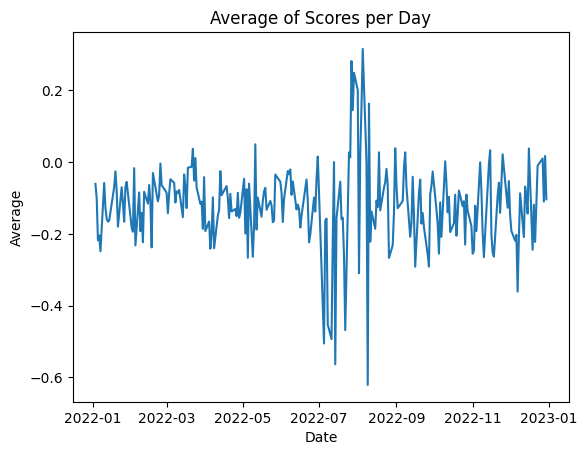

In [95]:
import matplotlib.pyplot as plt

# create a figure and axis object
fig, ax = plt.subplots()

# plot the average data against the date
ax.plot(merged_df1['date'],merged_df1['reg_output'])

# set the x-axis label
ax.set_xlabel('Date')

# set the y-axis label
ax.set_ylabel('Average')

# set the title of the plot
ax.set_title('Average of Scores per Day')

# display the plot
plt.show()
#
# This will create a line plot with the date on the x-axis and the average score on the y-axis. The plot will have a title "Average of Scores per Day" and x-axis label "Date" and y-axis label "Average".

plt.show()